In [ ]:
# Import Libraries and dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Dataset
emails=pd.read_csv("/content/drive/MyDrive/Project P62-NLP Emails/Emails.csv")
emails

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is availab...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [ ]:
etext=emails[['content','Class']]
etext

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


## Auto EDA

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 34.6 MB 632 kB/s
     |████████████████████████████████| 10.1 MB 32.2 MB/s 
     |████████████████████████████████| 636 kB 37.1 MB/s 
     |████████████████████████████████| 102 kB 49.2 MB/s 
     |████████████████████████████████| 675 kB 35.2 MB/s 
     |████████████████████████████████| 3.1 MB 28.7 MB/s 
     |████████████████████████████████| 62 kB 746 kB/s 
     |████████████████████████████████| 76 kB 2.9 MB/s 
     |████████████████████████████████| 812 kB 40.8 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=4296cfcb5568a6dd9b9d97df3d769ebcf7ddacd4dd3c91e25e3c4700a51c3028
  Stored in directory: /tmp/pip-ephem-wheel-cache-ydxergfu/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=95e4075616e104f25e58c13c9f5eec99e6df4523f2ce50b8bdaf2b9d2c77924e
  St

In [ ]:
# 1. Using Pandas Profiling
import pandas_profiling as pp
EDA_report=pp.ProfileReport(etext)
EDA_report.to_notebook_iframe()
EDA_report.to_file(output_file='Emails_PP_Report.html')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 155 kB/s 


                                             |          | [  0%]   00:00 -> (? left)


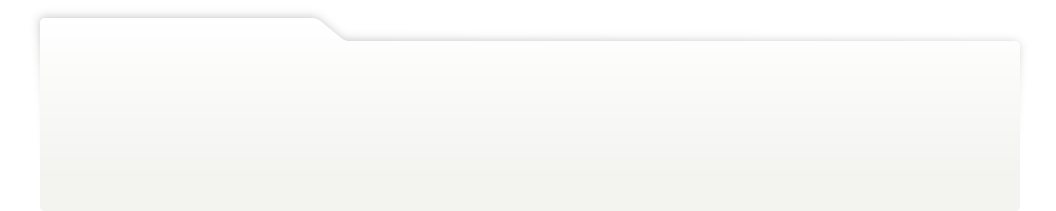
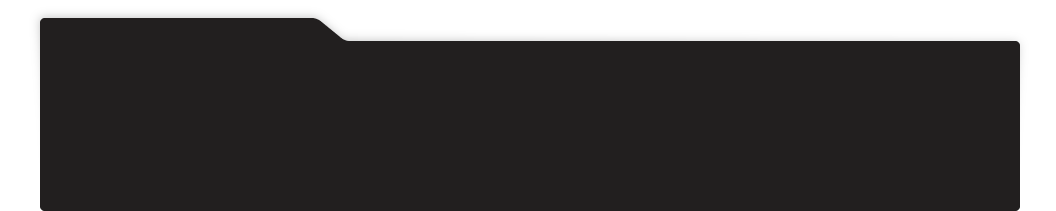
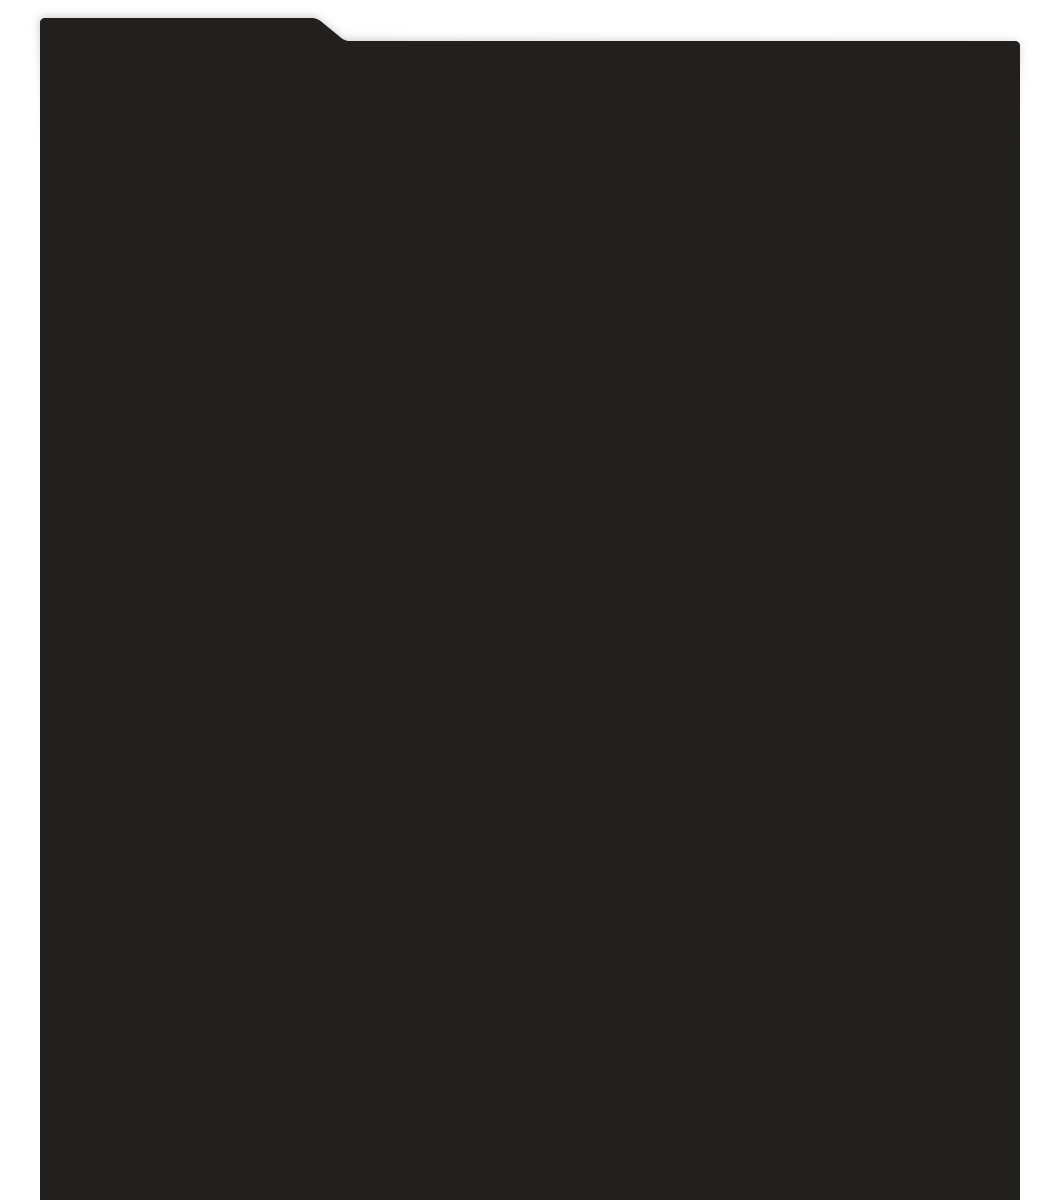
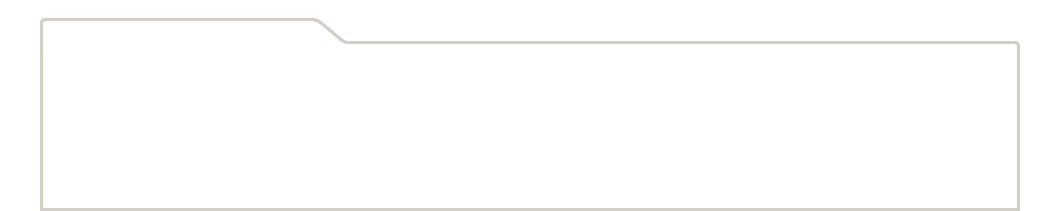
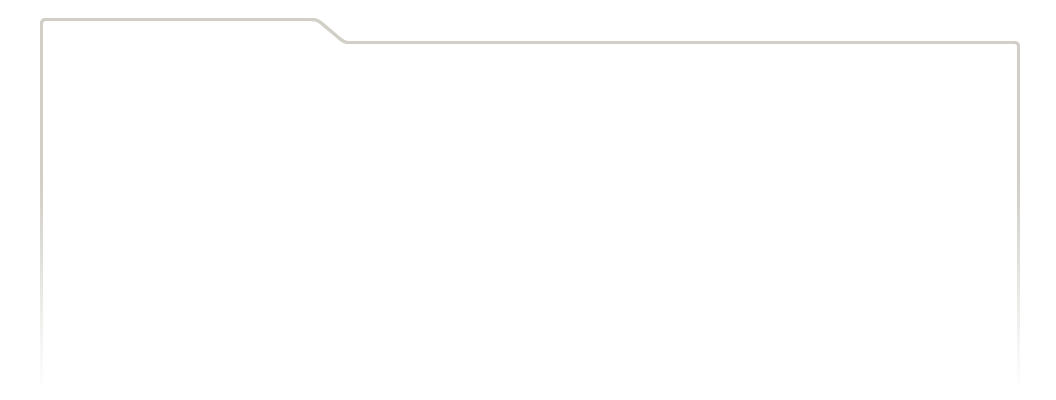
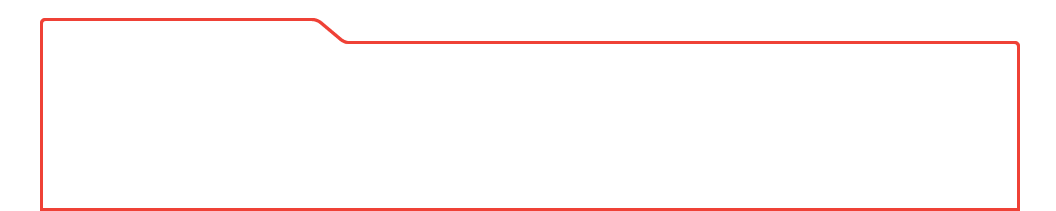
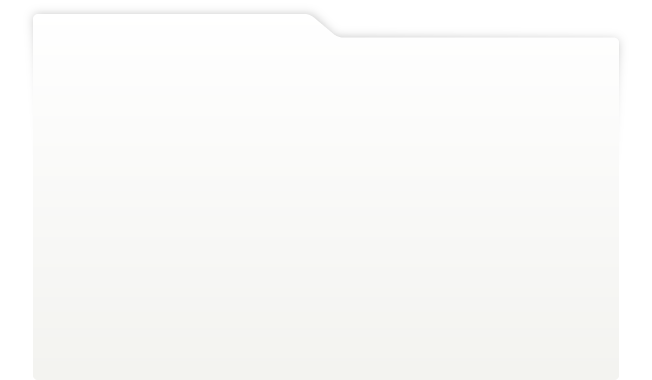
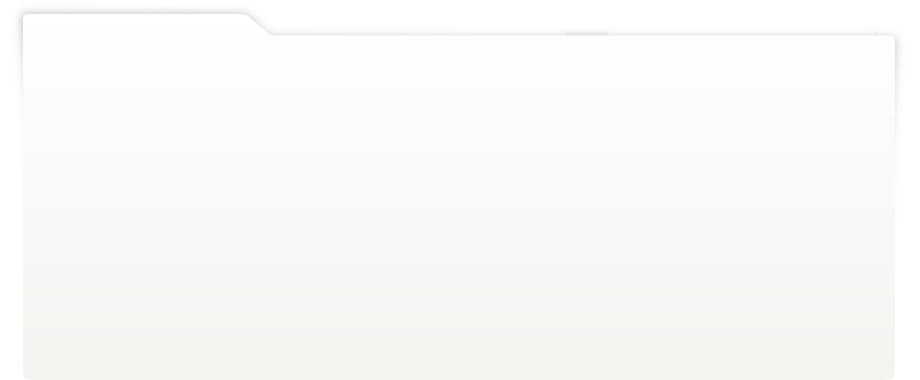
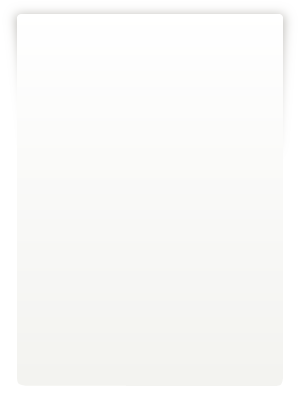
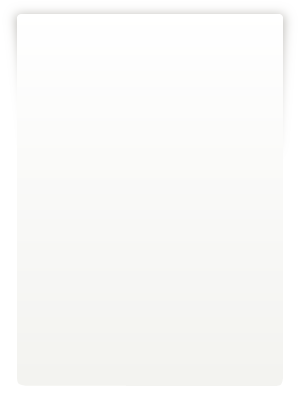
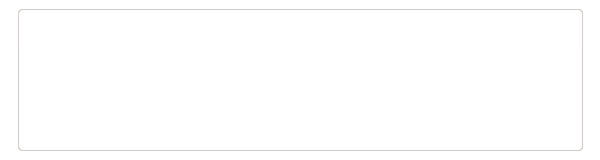
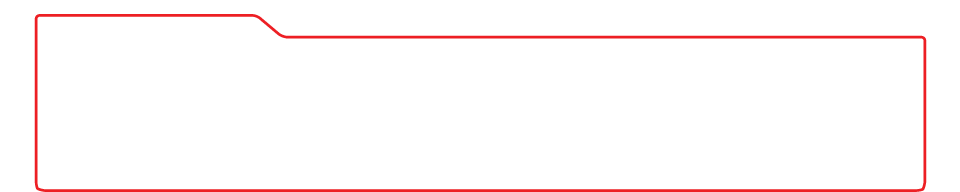
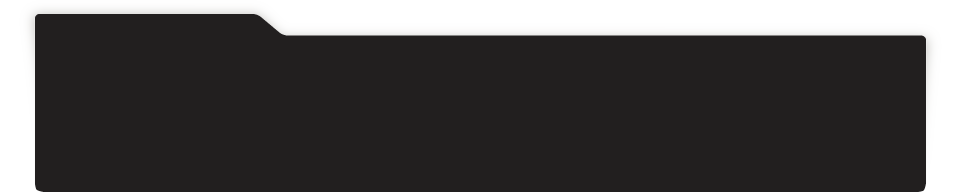
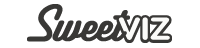
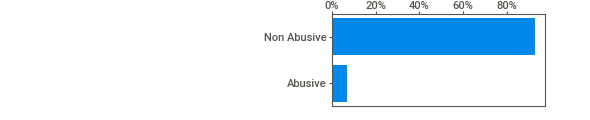
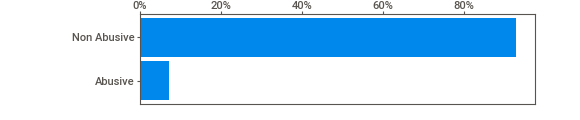
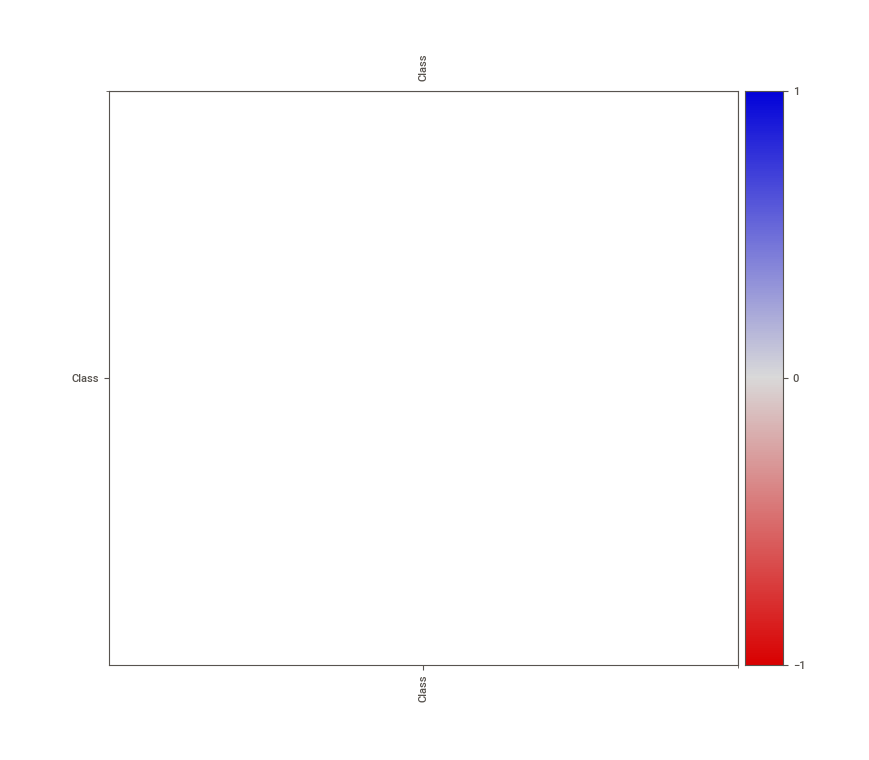
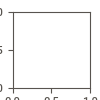

Report Emails_SV_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# 2. Using Sweetviz
import sweetviz as sv
sweet_report=sv.analyze(etext)
sweet_report.show_notebook()
sweet_report.show_html('Emails_SV_Report.html')

## EDA

In [ ]:
etext.isnull().sum()

content    0
Class      0
dtype: int64

In [ ]:
etext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48076 entries, 0 to 48075
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  48076 non-null  object
 1   Class    48076 non-null  object
dtypes: object(2)
memory usage: 751.3+ KB


In [ ]:
etext['Class'].value_counts()

Non Abusive    44666
Abusive         3410
Name: Class, dtype: int64

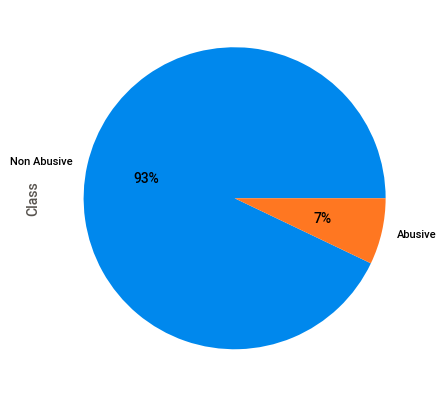

In [ ]:
etext['Class'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))
plt.show()

### Removing duplicates

In [ ]:
abusive=etext[etext['Class']=='Abusive']
abusive

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
3405,There is a lot of confused bullshit floating a...,Abusive
3406,"wow, three weeks away from the kids ! brave an...",Abusive
3407,\ngot this from late friday. have you ever hea...,Abusive
3408,"\n\n -----Original Message-----\nFrom: \t""Enge...",Abusive


In [ ]:
non_abusive=etext[etext['Class']=='Non Abusive']
non_abusive

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [ ]:
non_abusive[non_abusive.duplicated()]

,content,Class
4014,---------------------- Forwarded by Phillip K ...,Non Abusive
4015,---------------------- Forwarded by Phillip K ...,Non Abusive
4016,"Dave, \n\n Here are the names of the west desk...",Non Abusive
4017,"Paula,\n\n 35 million is fine\n\nPhillip",Non Abusive
4018,---------------------- Forwarded by Phillip K ...,Non Abusive
...,...,...
48071,"Dear Market Participants,\n\nPlease note the c...",Non Abusive
48072,"According to my fancy ciphering we made $310,0...",Non Abusive
48073,BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01...,Non Abusive
48074,Welcome to: DIAMONDS NEWSLETTER Issue:...,Non Abusive


In [ ]:
non_abusive=non_abusive.drop_duplicates()
non_abusive

,content,Class
3410,Here is our forecast\n\n,Non Abusive
3411,Traveling to have a business meeting takes the...,Non Abusive
3412,test successful. way to go!!!,Non Abusive
3413,"Randy,\n\n Can you send me a schedule of the s...",Non Abusive
3414,Let's shoot for Tuesday at 11:45.,Non Abusive
...,...,...
47974,Do you need new leads for your business ?\n D...,Non Abusive
47975,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
47977,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
47980,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [ ]:
etext=pd.concat([abusive,non_abusive]).reset_index(drop=True)
etext

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/1...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is availab...,Abusive
3,sorry i've taken so long...just been trying to...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23...,Abusive
...,...,...
26419,Do you need new leads for your business ?\n D...,Non Abusive
26420,"[IMAGE]\n [IMAGE] [IMAGE] GARTH BROOKS ""...",Non Abusive
26421,\n[IMAGE][IMAGE][IMAGE] \nDear SmartReminders ...,Non Abusive
26422,\n[IMAGE]\n [IMAGE] [IMAGE] [IMAGE] KID ...,Non Abusive


In [ ]:
etext.Class.value_counts()

Non Abusive    23014
Abusive         3410
Name: Class, dtype: int64

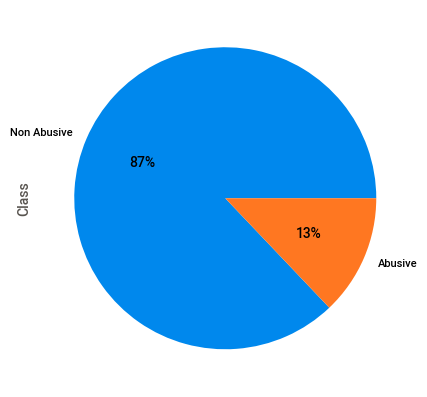

In [ ]:
etext['Class'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(10,5))
plt.show()

In [ ]:
from google.colab import files
etext.to_csv('etext2.csv')
files.download('etext2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Cleaning

In [ ]:
import re # regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text=text.lower()
    text=re.sub('\[.*?\]',' ',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    text=re.sub('[0-9' ']+',' ',text)
    text=re.sub('[''""…]', ' ', text)
    text=re.sub('[\n]', ' ', text)
    text=re.sub('[\s]', ' ', text)
    return text

clean = lambda x: clean_text(x)

In [ ]:
etext['content']=etext['content'].apply(clean)
etext['content']

0        eat shit     john j lavorato excelr           ...
1                                                 fuck you
2        gentlemen  the following champagne is availabl...
3        sorry i ve taken so long   just been trying to...
4        asshole     john j lavorato excelr           a...
                               ...                        
26419     do you need new leads for your business    do...
26420                garth brooks   wrapped up in you  ...
26421          dear smartreminders member             f...
26422                    kid rock   forever         off...
26423     you received this e mail because you register...
Name: content, Length: 26424, dtype: object

In [ ]:
# Word frequency before applying Stopwords
freq=pd.Series(' '.join(etext['content']).split()).value_counts()[:20] # for top 20
freq

the       244859
to        180830
and       118908
a         109068
of         99291
in         77875
you        70100
for        69188
excelr     69167
i          68157
com        67959
on         57810
is         56023
s          53946
that       47227
this       44753
ect        41268
from       40770
be         38636
with       36816
dtype: int64

In [ ]:
#Removing Stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['excelr', 'ect', 'com', 'hou', 'cc', 'td', 'http', 'www', 'font', 'original', 'message','subject', 'fw'])

etext['content'] = etext['content'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
etext['content']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        eat shit john j lavorato pm john arnold footba...
1                                                     fuck
2        gentlemen following champagne available approx...
3        sorry taken long trying fend chicks life soooo...
4        asshole john j lavorato john arnold john cant ...
                               ...                        
26419    need new leads business need increased interne...
26420    garth brooks wrapped win tickets trip garth br...
26421    dear smartreminders member franchoice free one...
26422    kid rock forever official kid rock site kidroc...
26423    received e mail registered e trade web site on...
Name: content, Length: 26424, dtype: object

In [ ]:
# word frequency after removal of stopwords
freq_nsw=pd.Series(' '.join(etext['content']).split()).value_counts()[:20] # for top 20
freq_nsw

please    17420
e         16668
pm        15467
time      14027
would     13405
b         13122
new       13017
sent      12033
one       12020
get       11318
size      10834
br        10652
mail      10355
may       10093
know      10074
week       9908
align      9780
type       9410
corp       9083
thanks     8876
dtype: int64

## Feature Extraction

### 1. count vectoriser (tells the frequency of a word)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(min_df=1,max_df=5)  # df = data frequency
X=vectorizer.fit_transform(etext['content'])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names(),'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [ ]:
word_freq_df.head(30)

,term,occurrences,frequency
0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
1,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,1,0.000007
2,aaaaaaaaaaaaaaaaaaaaaaaaaaaaafhzwiaaaaaaaadzuq...,1,0.000007
3,aaaaaaaaaaaaaaaaaaaaahzpzxcaaaaaabok,1,0.000007
4,aaaaaaaaaaaawflaiaaaaaaaag,1,0.000007
5,aaaaaabwaad,4,0.000027
6,aaaaaewjvgbqaaaavx,1,0.000007
7,aaaabrtzwfz,1,0.000007
8,aaabbqebaqebaqaaaaaaaaadaaec,1,0.000007
9,aaagbagabbqa,1,0.000007


### 2.TFIDF (Term Frequency Inverse Document Frequency) Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_features=500,max_df=1,smooth_idf=True) # keep top 500 words
doc_vec=vectorizer.fit_transform(etext['content'])
feature_names=vectorizer.get_feature_names()
dense=doc_vec.todense()  # todense returns a matrix
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [ ]:
df

,abramoff,acegas,actarray,activitated,advantium,aeb,aefa,afterholiem,aftertax,afudc,akamaite,akiyama,akratish,alka,almrud,altorfer,ameriquest,analyticals,ancestry,angelides,antimatter,anybo,aparam,appliancekiosk,appropriated,apqc,arj,armentano,artesa,asscher,atos,atul,ausnit,authorisations,autorho,bathwick,bcddfd,bcn,bdpres,beckel,...,ussoccerstore,ustelenet,utils,vb,vcard,verner,vg,vidigo,viewswire,visorphone,vivitar,vneshtoprom,wahad,wakeland,wasson,waukee,webspirations,wechsler,weingarten,weisberg,wellmanage,whhf,willem,winecommune,wingard,witi,wjjecdkynsdgcp,wpa,xtek,yachts,yfti,yil,yourman,youwintrivia,zeroue,zonealarm,zoomerang,zpro,zubeida,zzzipe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. N-Gram Vectorizer

In [ ]:
# Bi-gram

def get_top_n2_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    word_freq=sorted(word_freq, key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [ ]:
top2_words=get_top_n2_words(etext['content'],n=200) # top 200
top2_df=pd.DataFrame(top2_words)
top2_df.columns=['Bi-grams','Freq']
top2_df.head(50)

,Bi-grams,Freq
0,align right,5423
1,let know,4412
2,class align,3988
3,face arial,3962
4,fantasy sportsline,3775
5,sportsline mp,3651
6,arial helvetica,3551
7,br br,3473
8,fool asp,3460
9,mp elink,3416


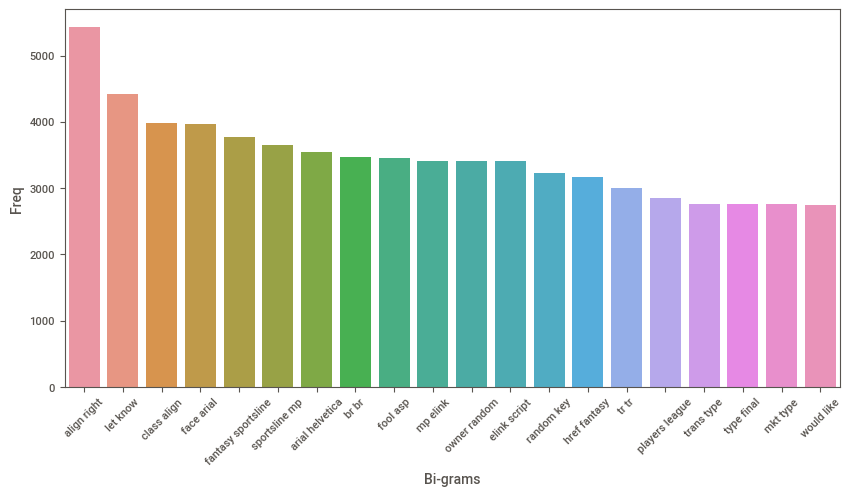

In [ ]:
# Bi-gram plot

import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_bigram['Bi-grams'],y=top20_bigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_bigram['Bi-grams'])
plt.show()

In [ ]:
# Tri-gram

def get_top_n3_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    word_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    word_freq=sorted(word_freq, key=lambda x: x[1],reverse=True)
    return word_freq[:n]

In [ ]:
top3_words=get_top_n3_words(etext['content'],n=200)
top3_df=pd.DataFrame(top3_words)
top3_df.columns=['Tri-grams','Freq']

In [ ]:
top3_df.head(50)

,Tri-grams,Freq
0,fantasy sportsline mp,3648
1,mp elink script,3414
2,sportsline mp elink,3409
3,owner random key,3235
4,face arial helvetica,3210
5,href fantasy sportsline,3165
6,class align right,2810
7,trans type final,2761
8,mkt type trans,2582
9,type trans date,2582


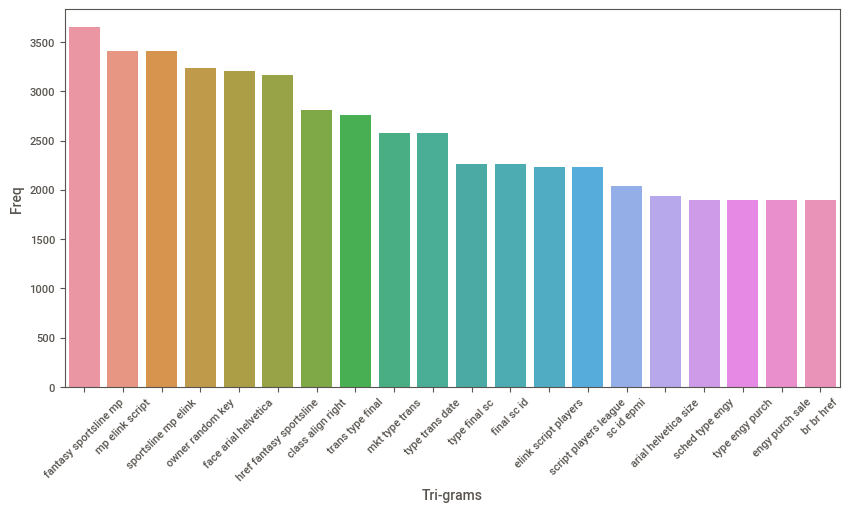

In [ ]:
# Tri-gram plot

top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(10,5))
plot=sns.barplot(x=top20_trigram['Tri-grams'],y=top20_trigram['Freq'])
plot.set_xticklabels(rotation=45,labels=top20_trigram['Tri-grams'])
plt.show()

## Word Cloud

(-0.5, 1799.5, 1499.5, -0.5)

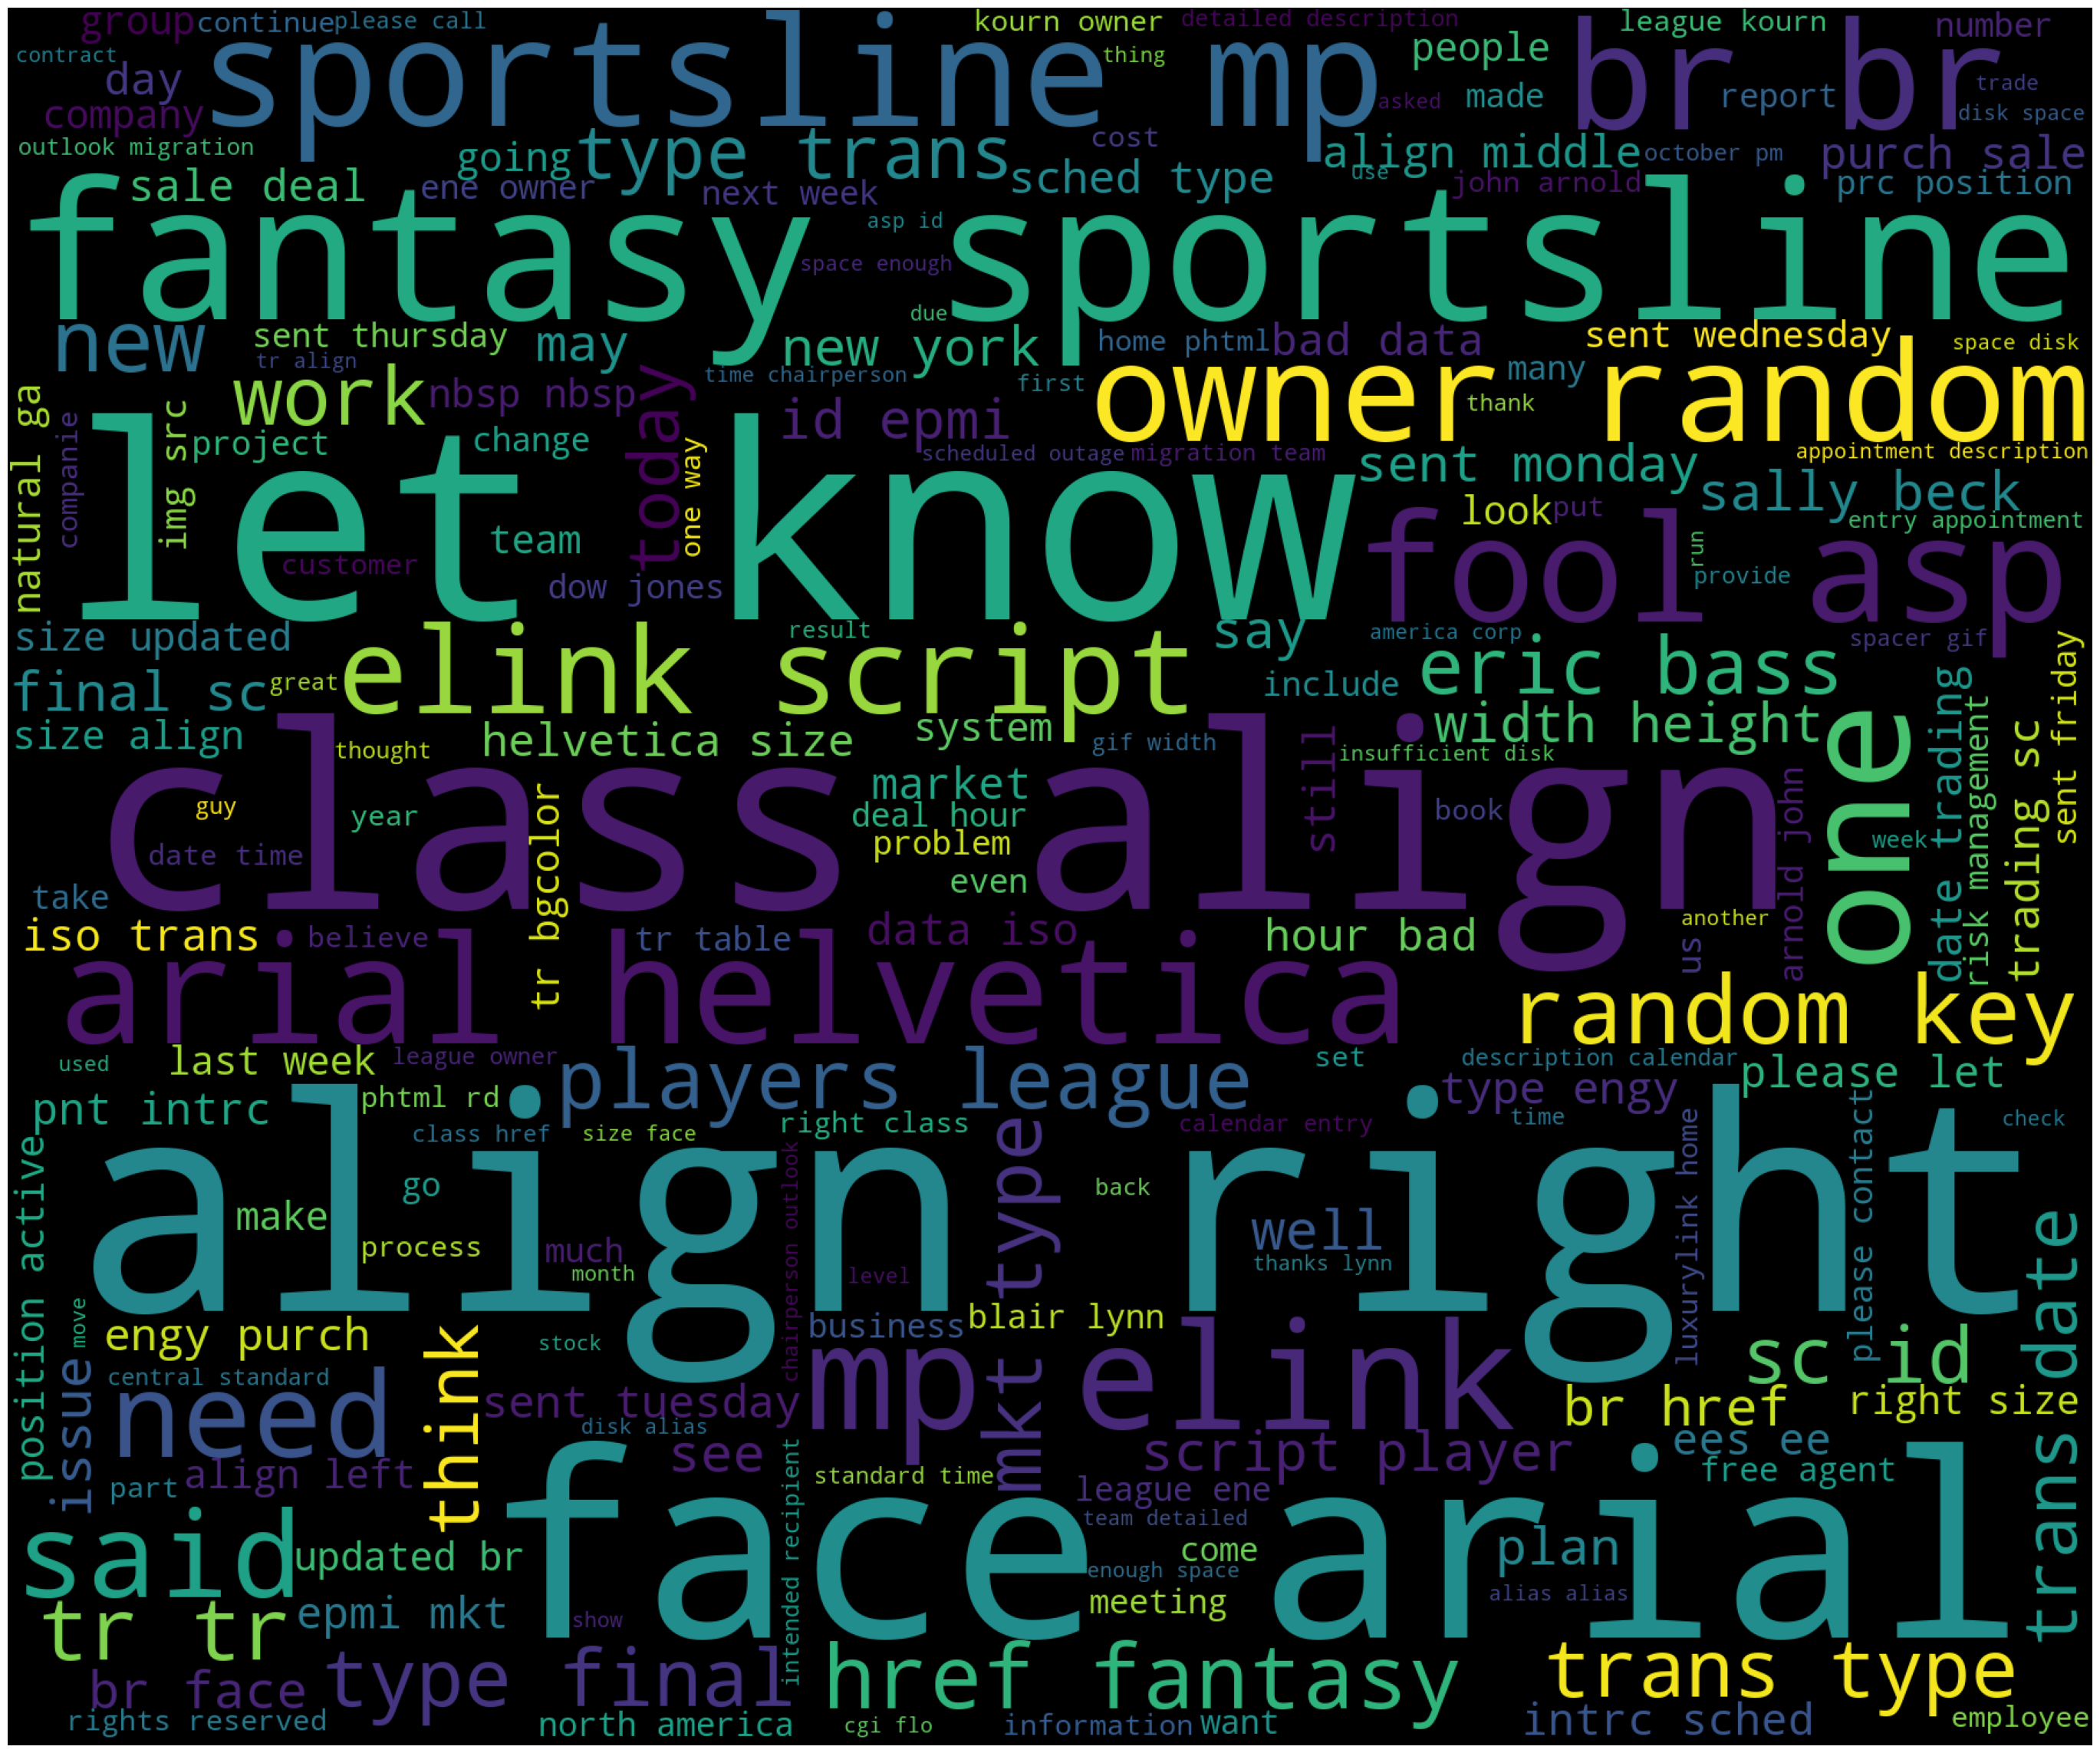

In [ ]:
# wordcloud for entire corpus

from wordcloud import WordCloud

string_total=' '.join(etext['content'])

wordcloud_str=WordCloud(background_color='black',width=1800,height=1500,).generate(string_total)

plt.figure(figsize=(40,30))
plt.imshow(wordcloud_str)
plt.axis('off')

# Data Preprocessing

In [ ]:
etext

,content,Class
0,eat shit john j lavorato pm john arnold footba...,Abusive
1,fuck,Abusive
2,gentlemen following champagne available approx...,Abusive
3,sorry taken long trying fend chicks life soooo...,Abusive
4,asshole john j lavorato john arnold john cant ...,Abusive
...,...,...
26419,need new leads business need increased interne...,Non Abusive
26420,garth brooks wrapped win tickets trip garth br...,Non Abusive
26421,dear smartreminders member franchoice free one...,Non Abusive
26422,kid rock forever official kid rock site kidroc...,Non Abusive


### BOW word_count_matrix

In [ ]:
def split_into_words(i):
    return (i.split(' '))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Preparing email texts into bow word count matrix format 
email_bow=CountVectorizer(analyzer=split_into_words).fit(etext.content)

In [ ]:
# For understanding purpose; the o/p looks like this for egs:

# ["mailing","body","texting"]
# ["mailing","awesome","good"]

# ["mailing","body","texting","good","awesome"]



#        "mailing" "body" "texting" "good" "awesome"
#  0          1        1       1        0       0
 
#  1          1        0        0       1       1    


In [ ]:
# For all messages
all_emails_matrix=email_bow.transform(etext.content)
all_emails_matrix.shape

(26424, 85984)

### TFIDF tokenizer

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer=TfidfTransformer().fit(all_emails_matrix)

In [ ]:
# Preparing TFIDF for all emails
all_emails_tfidf=tfidf_transformer.transform(all_emails_matrix)
all_emails_tfidf.shape

(26424, 85984)

### Label Encoding the class

In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels

le = preprocessing.LabelEncoder()
  
etext['Class']= le.fit_transform(etext['Class']) 

etext['Class'].value_counts()

1    23014
0     3410
Name: Class, dtype: int64

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(all_emails_tfidf,etext['Class'],test_size=0.3,random_state=42)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((18496, 85984), (7928, 85984), (18496,), (7928,))

### Data Balancing using SMOTE

In [ ]:
# 1. Oversampling

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)

# transform the dataset
x_train_os,y_train_os=oversample.fit_resample(x_train,y_train)

In [ ]:
x_train_os.shape,y_train_os.shape

((32180, 85984), (32180,))

In [ ]:
# 2. Undersampling

from imblearn.under_sampling import RandomUnderSampler
undersample=RandomUnderSampler(random_state=42)

# transform the dataset
x_train_s,y_train_s=undersample.fit_sample(x_train_os,y_train_os)

In [ ]:
x_train_s.shape,y_train_s.shape

((32180, 85984), (32180,))

## 1. Multinomial Naive Bayes Classifier Algorithm

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
classifier_mnb=MB()
model_mnb=classifier_mnb.fit(x_train_s,y_train_s)

train_pred_mnb=model_mnb.predict(x_train_s)
accuracy_train_mnb=np.mean(train_pred_mnb==y_train_s)
print('accuracy_train_mnb:',accuracy_train_mnb)

test_pred_mnb=model_mnb.predict(x_test)
accuracy_test_mnb=np.mean(test_pred_mnb==y_test)
print('accuracy_test_mnb:',accuracy_test_mnb)

accuracy_train_mnb: 0.9710379117464264
accuracy_test_mnb: 0.9470232088799193


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_mnb))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82      1004
           1       0.99      0.95      0.97      6924

    accuracy                           0.95      7928
   macro avg       0.86      0.95      0.89      7928
weighted avg       0.96      0.95      0.95      7928



## 2. Support Vector Machines Classifier Algorithm



In [ ]:
from sklearn.svm import SVC
SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')
model_svm=SVM.fit(x_train_s,y_train_s)

train_pred_svm=model_svm.predict(x_train_s)
accuracy_train_svm=np.mean(train_pred_svm==y_train_s)
print('accuracy_train_svm:',accuracy_train_svm)

test_pred_svm=model_svm.predict(x_test)
accuracy_test_svm=np.mean(test_pred_svm==y_test)
print('accuracy_test_svm:',accuracy_test_svm)

accuracy_train_svm: 0.9988502175264139
accuracy_test_svm: 0.9881432896064581


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_svm))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1004
           1       0.99      0.99      0.99      6924

    accuracy                           0.99      7928
   macro avg       0.97      0.97      0.97      7928
weighted avg       0.99      0.99      0.99      7928



## 3. Logistic Regression Classifier Algorithm

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

model_log=log.fit(x_train_s,y_train_s)

train_pred_log=model_log.predict(x_train_s)
accuracy_train_log=np.mean(train_pred_log==y_train_s)
print('accuracy_train_log:',accuracy_train_log)

test_pred_log=model_log.predict(x_test)
accuracy_test_log=np.mean(test_pred_log==y_test)
print('accuracy_test_log:',accuracy_test_log)

accuracy_train_log: 0.9944996892479802
accuracy_test_log: 0.9805751765893037


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      1004
           1       0.99      0.98      0.99      6924

    accuracy                           0.98      7928
   macro avg       0.94      0.97      0.96      7928
weighted avg       0.98      0.98      0.98      7928



## 4. Decision Tree Classsifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

model_dtc=model_gini.fit(x_train_s,y_train_s)
train_pred_dtc=model_dtc.predict(x_train_s)
accuracy_train_dtc=np.mean(train_pred_dtc==y_train_s)
print('accuracy_train_dtc:',accuracy_train_dtc)

test_pred_dtc=model_dtc.predict(x_test)
accuracy_test_dtc=np.mean(test_pred_dtc==y_test)
print('accuracy_test_dtc:',accuracy_test_dtc)

accuracy_train_dtc: 0.6952144188937228
accuracy_test_dtc: 0.5380928355196771


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_dtc))

              precision    recall  f1-score   support

           0       0.21      0.92      0.34      1004
           1       0.98      0.48      0.65      6924

    accuracy                           0.54      7928
   macro avg       0.59      0.70      0.49      7928
weighted avg       0.88      0.54      0.61      7928



## 5. Random Forest Classsifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
num_trees=55 # default max trees=100
model=RandomForestClassifier(n_estimators=num_trees,max_features=2,random_state=0)

model_rfc=model.fit(x_train_s,y_train_s)
train_pred_rfc=model_rfc.predict(x_train_s)
accuracy_train_rfc=np.mean(train_pred_rfc==y_train_s)
print('accuracy_train_rfc:',accuracy_train_rfc)

test_pred_rfc=model_rfc.predict(x_test)
accuracy_test_rfc=np.mean(test_pred_rfc==y_test)
print('accuracy_test_rfc:',accuracy_test_rfc)


accuracy_train_rfc: 1.0
accuracy_test_rfc: 0.9783047426841575


In [ ]:
from sklearn.metrics import classification_report

# print classification report
print(classification_report(y_test,test_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1004
           1       0.98      1.00      0.99      6924

    accuracy                           0.98      7928
   macro avg       0.98      0.92      0.95      7928
weighted avg       0.98      0.98      0.98      7928



## Compare the results

In [ ]:
data={'Model':pd.Series(['Multinomial_NBC','SVM_SVC','Logistic_Reg_C','Decision_Tree_C','Random_Forest_C']),
    'Train Accuracy' : pd.Series([accuracy_train_mnb,accuracy_train_svm,accuracy_train_log,accuracy_train_dtc,accuracy_train_rfc]),
    'Test Accuracy':pd.Series([accuracy_test_mnb,accuracy_test_svm,accuracy_test_log,accuracy_test_dtc,accuracy_test_rfc])}
accuracy_table=pd.DataFrame(data)
accuracy_table.sort_values('Test Accuracy',ascending=False).reset_index(drop=True)

,Model,Train Accuracy,Test Accuracy
0,SVM_SVC,0.998850,0.988143
1,Logistic_Reg_C,0.994500,0.980575
2,Random_Forest_C,1.000000,0.978305
3,Multinomial_NBC,0.971038,0.947023
4,Decision_Tree_C,0.695214,0.538093


In [ ]:
# Model Deployment

In [ ]:
# testing with text
str_sentence='how are you all... Hope to see u soon and study together'
sentence = pd.DataFrame({'content':str_sentence},index=[0])
sentence=sentence.astype('U')
sentence

,content
0,how are you all... Hope to see u soon and stud...


In [ ]:
def pre_process():

    def clean_text(text):
        '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
        text=text.lower()
        text=re.sub('\[.*?\]',' ',text)
        text=re.sub('[%s]'% re.escape(string.punctuation),' ',text)
        text=re.sub('\w*\d\w*',' ',text)
        text=re.sub('[0-9' ']+',' ',text)
        text=re.sub('[''""…]', ' ', text)
        text=re.sub('[\n]', ' ', text)
        text=re.sub('[\s]', ' ', text)
        return text

    clean = lambda x: clean_text(x)    


In [ ]:
sentence['content']=sentence['content'].apply(clean)
sentence['content']

0    how are you all    hope to see u soon and stud...
Name: content, dtype: object

In [ ]:
stop_words = set(stopwords.words('english') + ['excelr', 'ect', 'com', 'hou', 'cc', 'td', 'http', 'www', 'font', 'original', 'message','subject', 'fw'])
sentence['content'] = sentence['content'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))
sentence['content']

0    hope see u soon study together
Name: content, dtype: object

In [ ]:
# Lemmatization

In [ ]:
estrip = [content.strip() for content in sentence.content] # remove both the leading and the trailing characters
estrip = [content for content in estrip if content] # removes empty strings, because they are considered in Python as False
estrip[0:10]

['hope see u soon study together']

In [ ]:
# Joining the list into one string/text
estrip_text=' '.join(estrip)
estrip_text

'hope see u soon study together'

In [ ]:
#Punctuation
no_punc_text = estrip_text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'hope see u soon study together'

In [ ]:
#Tokenization
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['hope', 'see', 'u', 'soon', 'study', 'together']


In [ ]:
len(text_tokens)

6

In [ ]:
# NLP english language model of spacy library
import spacy
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(text_tokens))
print(doc)

hope see u soon study together


In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['hope', 'see', 'u', 'soon', 'study', 'together']


In [ ]:
all_emails_matrix_sent=email_bow.transform(lemmas)
all_emails_matrix_sent.shape

(6, 85984)

In [ ]:
tfidf_transformer_sent=TfidfTransformer().fit(all_emails_matrix_sent)

In [ ]:
all_emails_tfidf_sent=tfidf_transformer_sent.transform(all_emails_matrix_sent)
all_emails_tfidf_sent.shape

(6, 85984)

In [ ]:
prediction=model_log.predict(all_emails_tfidf_sent)
result=prediction.all()
result

True

In [ ]:
if result==False:
    print('This is a Abusive Email')
else:
    print('This is a Non Abusive Email')

This is a Non Abusive Email
